In [74]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Input

In [4]:
## Load imdb dataset
max_features = 10000 ## Vocab size
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Print data shape 
print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Test data shape: {X_test.shape}, Training labels shape: {y_test.shape}')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (25000,), Training labels shape: (25000,)
Test data shape: (25000,), Training labels shape: (25000,)


In [10]:
## Data inspection 
sample_review = X_train[0]
sample_label = y_train[0]

print(f'Sample review(as integers): {sample_review}')
print(f'Sample label; {sample_label}')

Sample review(as integers): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Sample label; 1


In [52]:
# Mapping of words index back to words
word_index = imdb.get_word_index()
word_index


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [56]:
reverse_word_index = {value:key for key, value in word_index.items()}


In [58]:
decoded_review = ' '.join([reverse_word_index.get(i-3, "?") for i in sample_review])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [60]:
## Padding
max_len = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)
X_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]])

In [114]:
## Train simple RNN
model=Sequential()
model.add(Input(shape=(max_len,)))
model.add(Embedding(max_features, output_dim=128)) ## Embedding Layer
model.add(SimpleRNN(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [130]:
model = Sequential([
    Input(shape=(max_len,)),
    Embedding(input_dim=max_features, output_dim=128),
    SimpleRNN(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [132]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_6 (SimpleRNN)             │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,313,025 (5.01 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

In [138]:
## EarlyStop callback
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 5, verbose = 1, restore_best_weights = True)

In [140]:
## Train with early stopping 
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])
model.fit(
    X_train, y_train, epochs = 10, batch_size = 32,
    validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 92s 141ms/step - accuracy: 0.5728 - loss: 10903047110656.0000 - val_accuracy: 0.6072 - val_loss: 0.6427
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 145ms/step - accuracy: 0.6828 - loss: 2789804.2500 - val_accuracy: 0.6134 - val_loss: 0.6353
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 94s 150ms/step - accuracy: 0.7231 - loss: 0.5925 - val_accuracy: 0.6356 - val_loss: 0.6244
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 155ms/step - accuracy: 0.7463 - loss: 0.5628 - val_accuracy: 0.6402 - val_loss: 0.6195
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 154ms/step - accuracy: 0.7698 - loss: 0.5324 - val_accuracy: 0.6400 - val_loss: 0.6177
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 94s 150ms/step - accuracy: 0.7861 - loss: 0.5082 - val_accuracy: 0.6462 - val_loss: 0.6186
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 145ms/step - accuracy: 0.7908 - loss: 0.4829 - val_accuracy: 0.6496 - val_loss: 0.6234
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 90s 144ms/step - accurac

<Axes: >

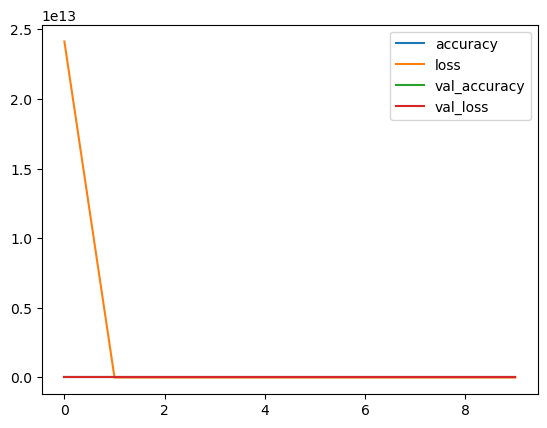

In [142]:
import pandas as pd
pd.DataFrame(model.history.history).plot()

### Model Saving 

In [147]:
model.save('imdb_rnn.keras')